Hantz Angrand 
Data 620 Project 1 
Title: Riders of citybike in NYC

For your first project, you are asked to Identify and load a network dataset that has some categorical information available for each node. For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality. Compare your centrality measures across your categorical groups. For example, using the dataset from a study of romantic relationships among high school students in Columbus, Ohio [http://researchnews.osu.edu/archive/chains.htm], you might want to determine if there are any differences in your calculated centrality measures between the two sexes. You might use a t-test or another statistical measure to support your findings.

City Bike started their operation in NYC in the summer of 2013. The data collected include the following fields:
Trip Duration (seconds) 
Start Time and Date 
Stop Time and Date 
Start Station Name 
End Station Name 
Station ID 
Station Lat/Long
Bike ID 
User Type (Customer = 24-hour pass or 7-day pass user; Subscriber = Annual Member) 
Gender (Zero=unknown; 1=male; 2=female) 
Year of Birth

We will focus on the Start Station and End Station as nodes, and genre as a categorical variable. Edges in the network will be bike trips between stations, which in this case means start station to end station, and will be focused only on which station the bike was picked up and returned, we are not taking into account where the bike may have been taken in between. 

This analysis will allow us to determine which stations are most important to the network based on various centrality measures.  We will also compare these measures between genre.

In [1]:
#Import Libraries
import numpy as np 
import pylab 
import scipy.stats as stats

In [2]:
# importing csv module 
import csv 

# csv file name 
filename = "202001-citibike-tripdata.csv"

with open(filename, 'r') as f:
    reader = csv.reader(f)
    header = next(reader)

In [3]:
[header[4],header[8],header[14]]

['start station name', 'end station name', 'gender']

In [4]:
import networkx as net
g=net.Graph()

with open('202001-citibike-tripdata.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)  
    for line in reader:
        node1 = line[4]
        
        node2 = line[8]
        g.add_edge(node1,node2,genre=line[14])

In [5]:
import matplotlib.pyplot as plot

In [6]:
#write the graph to a file so it doesn't have to be re-created every time
net.write_pajek(g, "citibike.net")
g=net.read_pajek("citibike.net")

In [7]:
len(g.nodes())

896

In [8]:
len(g.edges())

99419

In [9]:
g.edges()[100]

('1 Ave & E 16 St', 'Broadway & W 38 St')

In [10]:
g['1 Ave & E 16 St']['Broadway & W 38 St']

{0: {'weight': 1.0, 'genre': '1'}}

Degree Centrality: Degree is the number of connections that a node has. In this network it is the number of non-directional trip patterns that the station is part of. If a station has high degree centrality relative to other stations, this means that there are more trip patterns that begin and end at this station than at other stations

In [11]:
#Degree of every node in the network
deg = net.degree(g)


In [12]:
#Minimum degree of any node
min(deg.values())

1

In [13]:
#Maximum degree of any node
max(deg.values())

495

In [14]:
#function to return a sorted degree list 
def sorted_map(m):
    #map_dict =dict(m)
    ms = sorted(m, key=m.__getitem__, reverse=True)
    return ms

In [42]:
ds = sorted_map(deg)


In [43]:
ds[0:10]

['S 5 Pl & S 5 St',
 'Pershing Square North',
 'Broadway & E 22 St',
 'Forsyth St & Canal St',
 'E 17 St & Broadway',
 '1 Ave & E 44 St',
 '1 Ave & E 62 St',
 'Stanton St & Chrystie St',
 'Grand St & Elizabeth St',
 'E 4 St & 2 Ave']

Those 10 stations represent the ones that are appearing in trip pattern.  

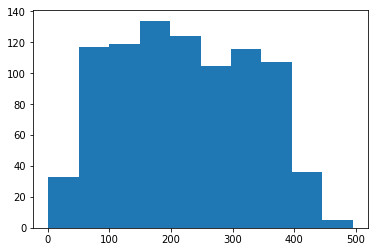

In [15]:
#display a histogram of nodes in 10 bins
hst=plot.hist(deg.values(),10)


Closeness Centrality: We are trying to figure out the role of a station in the trip network.  A station with higher closeness is better connected to other stations based on customer trips and is an important part of the network.

In [16]:
#distance/closeness: closeness centrality
cc = net.closeness_centrality(g)

In [17]:
ds_cc = sorted_map(cc)

The station with the highest centrality are:

In [18]:
ds_cc[0:10]

['S 5 Pl & S 5 St',
 'Pershing Square North',
 'Broadway & E 22 St',
 'E 17 St & Broadway',
 'Forsyth St & Canal St',
 '1 Ave & E 62 St',
 '1 Ave & E 44 St',
 'Grand St & Elizabeth St',
 'Stanton St & Chrystie St',
 'E 4 St & 2 Ave']

Those are stations that appear most often in a trip in network. let's plot the distribution

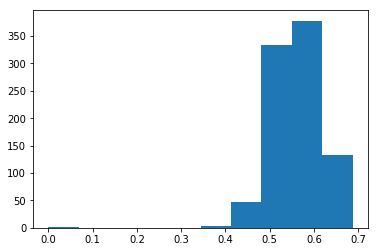

In [19]:
h=plot.hist(cc.values(),10)

It is left skewed normal distribution.

Betweenness centrality: 
We will study in this section which station that plays a central role.  IF the trip starts and end more often in those station, they play a hub role in the network.

In [20]:
bc=net.betweenness_centrality(g)

In [21]:
bs = sorted_map(bc)

In [22]:
#top 10 stations for Betweenness Centrality
bs[:10]

['S 5 Pl & S 5 St',
 'Metropolitan Ave & Bedford Ave',
 'Kent Ave & N 7 St',
 'Queens Plaza North & Crescent St',
 'E 4 St & 2 Ave',
 'Broadway & E 22 St',
 'Pershing Square North',
 '1 Ave & E 62 St',
 '1 Ave & E 44 St',
 '1 Ave & E 68 St']

This list is quite different from the previous list.  It is understanble since bikers do not transfer between station. Let's plot the betweennes distribution.

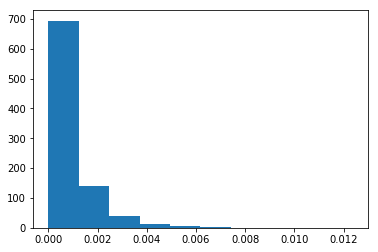

In [23]:
#plot the distribution
h=plot.hist(bc.values(),10)

The following histogram, shows that the highest betweeness centrality is very low.

Eigenvector centrality
Based on the importance of a station we will determine the importance for a node.

In [24]:
#change graph format to use eigenvector function
ev = net.Graph(g)

In [25]:
evc = net.eigenvector_centrality(ev)

In [26]:
evcs=sorted_map(evc)

In [27]:
evcs[:10]

['Pershing Square North',
 'Broadway & E 22 St',
 'E 17 St & Broadway',
 'Pershing Square South',
 '6 Ave & W 33 St',
 'Broadway & W 25 St',
 'E 39 St & 2 Ave',
 'W 21 St & 6 Ave',
 '8 Ave & W 33 St',
 'E 4 St & 2 Ave']

Comparing the eigenvector centrality list with the centrality list we see some overlap of station and some new comers. Let's plot the histogram.

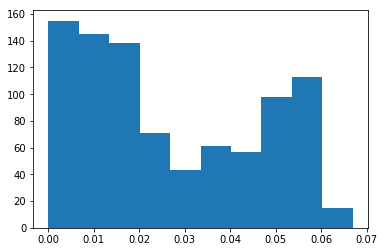

In [60]:
h=plot.hist(evc.values(),10)

Categorical Study
We will be looking at degree centrality and eigenvector centrality to compare the value for different categorical values.  We are using genre as a catregorical value where 1 represents male and 2 is female. We are trying to discover if it is normally distributed between genre.

In [28]:
#Let's split the data between male and female
#edgeMale = (n for n in g if g.node[n]['region']=='1')
edgeMale =((u,v) for u,v,d in g.edges_iter(data=True) if d['genre']== '1')
edgeFemal =((u,v) for u,v,d in g.edges_iter(data=True) if d['genre']=='2')

In [29]:
gM = net.Graph()

In [30]:
gM.add_edges_from(edgeMale)

In [31]:
len(gM.edges())

70403

In [32]:
#Create en Empty graph
gF = net.Graph()

In [33]:
#Add edges to the graph
gF.add_edges_from(edgeFemal)

In [34]:
#Length of edges
len(gF.edges())

23597

In [35]:
#Degree Centrality for male and female
degM = net.degree(gM)
degF = net.degree(gF)

In [36]:
dsM = sorted_map(degM)
dsF = sorted_map(degF)

In [37]:
#Top 10 stations for male

dsM[0:10]

['Pershing Square North',
 'Broadway & E 22 St',
 'S 5 Pl & S 5 St',
 'Pershing Square South',
 'E 47 St & Park Ave',
 '8 Ave & W 33 St',
 'W 41 St & 8 Ave',
 '1 Ave & E 62 St',
 'Forsyth St & Canal St',
 'E 17 St & Broadway']

In [38]:
dsF[0:10]

['S 4 St & Wythe Ave',
 '1 Ave & E 44 St',
 '1 Ave & E 68 St',
 'Grand St & Elizabeth St',
 'Jay St & York St',
 'Metropolitan Ave & Bedford Ave',
 '1 Ave & E 18 St',
 'E 17 St & Broadway',
 'St Marks Pl & 1 Ave',
 'Wythe Ave & Metropolitan Ave']

The list of top 10 stations are different for male and female

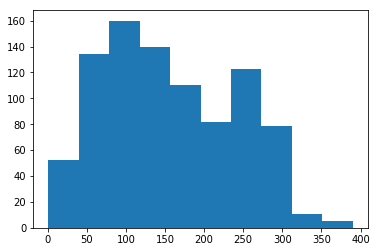

In [39]:
#Plot histogram for Male
(nM, bins, patches)=plot.hist(degM.values(),10)

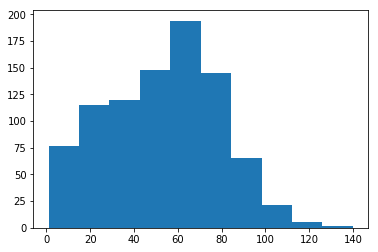

In [40]:
#Plot histogram for Female
(nF, bins, patches)=plot.hist(degF.values(), 10)

Testing is required to determine if these distributions are the same. To use a t-test both distributions must be approximately normal.


we check if residuals follow Normal (Gaussian) distribution. And that can be often visually verified by using a Q-Q plot such as the one presented below.

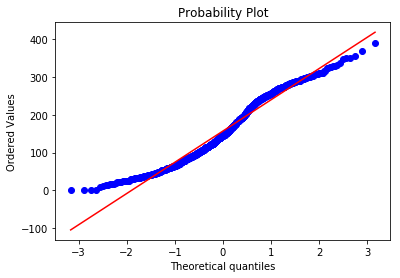

In [41]:
stats.probplot(list(degM.values()), dist="norm", plot=pylab)
pylab.show()

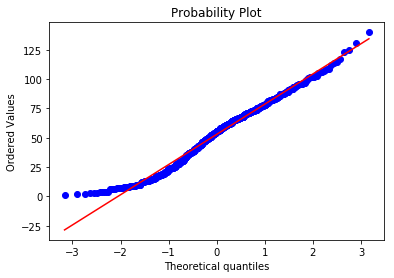

In [42]:
stats.probplot(list(degF.values()), dist="norm", plot=pylab)
pylab.show()

The next step is to check the variances with an F-test.

In [43]:
#F-test for male relative to female
FM = np.var(list(degM.values())/np.var(list(degF.values())))

In [44]:
FM

0.015687768576237274

In [45]:
#Do an F-test with alpha = 0.05
#get degrees of freedom
dfM = len(list(degM.values())) - 1
dfF = len(list(degF.values())) - 1

In [46]:
p_value = stats.f.cdf(FM, dfM, dfF)
p_value

0.0

In [47]:
t,p = stats.ttest_ind(list(degM.values()), list(degF.values()))
print ('p = ',p)
if p < 0.05:
    print ('significant')
else:
    print ('not significant')

p =  1.0695834536753997e-208
significant


There is a statistically significant difference between Male and Female distributions of degree centrality

Compute eigenvector centrality for Males and Females

In [48]:
eM = net.Graph(gM)
eF = net.Graph(gF)

In [49]:
egM = net.eigenvector_centrality(eM)
egF = net.eigenvector_centrality(eF)

In [50]:
egMs = sorted_map(egM)
egFs = sorted_map(egF)

In [51]:
egMs[0:10]

['Pershing Square North',
 '8 Ave & W 33 St',
 'Pershing Square South',
 'W 41 St & 8 Ave',
 'E 47 St & Park Ave',
 'Broadway & E 22 St',
 '8 Ave & W 31 St',
 'W 33 St & 7 Ave',
 'W 31 St & 7 Ave',
 'W 38 St & 8 Ave']

In [52]:
egFs[0:10]

['1 Ave & E 44 St',
 'E 9 St & Avenue C',
 '1 Ave & E 18 St',
 'Grand St & Elizabeth St',
 'E 25 St & 1 Ave',
 '6 Ave & Broome St',
 'St Marks Pl & 1 Ave',
 'University Pl & E 14 St',
 'E 17 St & Broadway',
 '1 Ave & E 68 St']

Both list of top 10 are very different

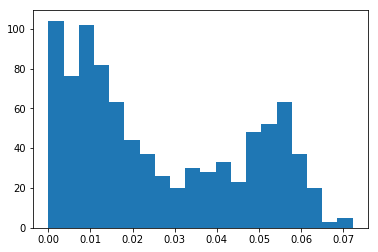

In [53]:
h=plot.hist(egM.values(),20)

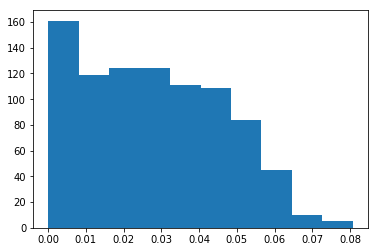

In [55]:
h=plot.hist(egF.values(),10)

Let's check for normality and variance

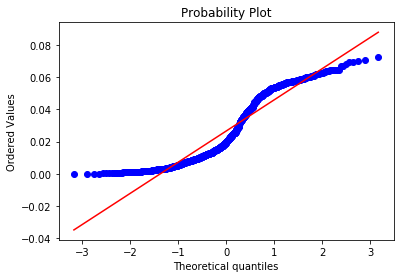

In [56]:
#QQ plot for male
stats.probplot(list(egM.values()), dist="norm", plot=pylab)
pylab.show()

The point deviates from the normal line

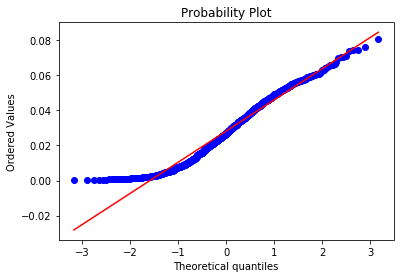

In [57]:
stats.probplot(list(egF.values()), dist="norm", plot=pylab)
pylab.show()

Both graph deviate for the normal distribution line

In [58]:
t,p = stats.ttest_ind(list(egM.values()), list(egF.values()))
print ('p = ',p)
if p < 0.05:
    print ('significant')
else:
    print ('not significant')

p =  0.06444890997751024
not significant


There is no significance difference between the distribution of Male and female considering the eigenvector value.

References:
https://github.com/sms2015/DATA-620/blob/master/Project%201.ipynb
https://github.com/sms2015/DATA-620/blob/master/Project%201.ipynb
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/f-test/